In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.ticker import FormatStrFormatter 
import matplotlib.gridspec as gridspec 
import matplotlib.ticker as plticker


In [2]:
data = 'fom_2yrs_normalized.csv' #'fom_10yrs_normalized.csv'

In [3]:
fom=pd.read_csv(data)

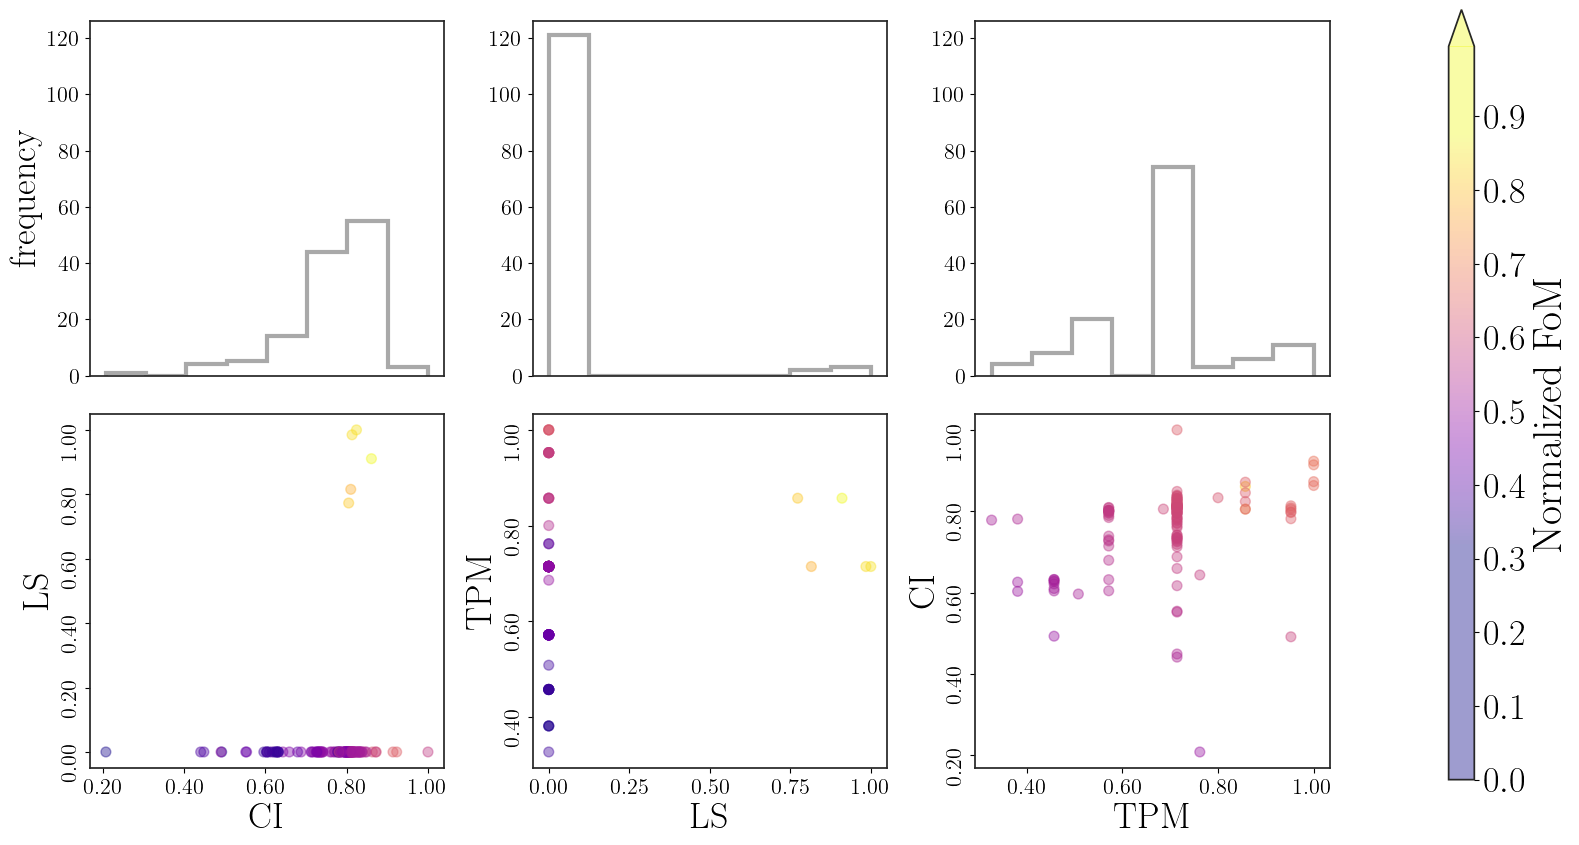

In [7]:
def normalize(x):
        N=1/(np.nansum((x - x.min(0)) / x.ptp(0)))
        return N*(x - x.min(0)) / x.ptp(0)
mpl.rcParams["text.usetex"] = True
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "10"
#mpl.rcParams.update({'font.size': 16}) 
#plt.rc('legend', fontsize=25) 
plt.rc('xtick',labelsize=16) 
plt.rc('ytick',labelsize=16) 
plt.rcParams['axes.grid']= False 
plt.rcParams['axes.edgecolor']= '0.15' 
plt.rcParams['axes.linewidth']= 1.25 
fig = plt.figure(figsize=(20,10)) 
grid = gridspec.GridSpec(2, 3, wspace=0.25, hspace=0.04) 
for i ,m in zip(np.arange(0,6,1), ['CI','LS','TPM']*2): 
    ax=plt.Subplot(fig, grid[i]) 
    ax.set_box_aspect(1)
    if i in [0,1,2]: 
        #fom[m].plot.density(ax=ax)
        #val, bins = np.histogram(fom[m].to_numpy(dtype=np.float32)[~np.isnan(fom[m].values.astype(None))],bins=8)
        #kde_estim = gaussian_kde(fom[m].to_numpy(dtype=np.float32), bw_method='scott')
        #Z = kde_estim.evaluate(np.linspace(fom[m].to_numpy(dtype=np.float32).min()-0.1,fom[m].to_numpy(dtype=np.float32).max()+0.1,50))       
        #Z2 = normalize(Z)
        #ax.bar(bins[0:-1], 0.6*val[~np.isnan(val)]/np.sum(val[~np.isnan(val)]),np.median(np.diff(bins)),facecolor = 'gray', edgecolor='gray')
        #sns.distplot(a,color='grey',hist=False,kde=True, norm_hist=True,kde_kws={'common_norm':True},bins=8,ax=ax)
        ax.hist(fom[m].to_numpy(dtype=np.float32)[~np.isnan(fom[m].values.astype(None))],bins=8, histtype='step', lw=3, color="darkgray")
        #ax.plot(np.linspace(fom[m].to_numpy(dtype=np.float32).min()-0.1,fom[m].to_numpy(dtype=np.float32).max()+0.1,50), 3*Z2, "-",  color="darkgray", lw=2)
        ax.patch.set_facecolor('white') 
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f')) 
        ax.set_ylim([0,126])
        ax.get_xaxis().set_visible(False) 
        ax.get_yaxis().set_visible(True)
        ax.set_ylabel('', fontsize=16)
        if i ==0:
            ax.set_ylabel('frequency', fontsize=26)
        fig.add_subplot(ax) 

    else: 
        if i ==3: 
            #xy = np.vstack([df_norm_15['CI'],df_norm_15['LS']]) 
            #z = gaussian_kde(xy)(xy) 
            ax.scatter(fom['CI'],fom['LS'],c=(fom['CI']+fom['TPM']+fom['LS'])/3, s=50,cmap='plasma', marker='o',alpha=.4) 
            ax.grid(False) 
            loc = plticker.MultipleLocator(base=0.1) # this locator puts ticks at regular intervals
            #ax.yaxis.set_major_locator(loc)
            #ax.set_ylim([0.01,0.2]) 
            ax.patch.set_facecolor('white') 
            ax.set_ylabel('LS', fontsize=26) 
            ax.set_xlabel('CI', fontsize=26) 
            #ax.xaxis.set_tick_params(rotation=90)
            ax.yaxis.set_tick_params(rotation=90)
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f')) 
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) 
        elif i ==4: 
            #xy = np.vstack([df_norm_15['LS'],df_norm_15['TPM']]) 
            #z = gaussian_kde(xy)(xy) 
            ax.scatter(fom['LS'],fom['TPM'], c=(fom['CI']+fom['TPM']+fom['LS'])/3,s=50,cmap='plasma', marker='o',alpha=.4) 
            ax.grid(False) 
            #ax.set_ylim([0.01,0.2]) 
            loc = plticker.MultipleLocator(base=0.1) # this locator puts ticks at regular intervals
            #ax.yaxis.set_major_locator(loc)
            ax.patch.set_facecolor('white') 
            ax.set_xlabel('LS', fontsize=26) 
            ax.set_ylabel('TPM', fontsize=26) 
            #ax.xaxis.set_tick_params(rotation=90)
            ax.yaxis.set_tick_params(rotation=90)
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f')) 
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) 
        elif i ==5: 
            #xy = np.vstack([df_norm_15['LS'],df_norm_15['TPM']]) 
            #z = gaussian_kde(xy)(xy) 
            ax.scatter(fom['TPM'],fom['CI'], c=(fom['CI']+fom['TPM']+fom['LS'])/3,s=50,cmap='plasma', marker='o',alpha=.4,vmin=0,vmax=1) 
            ax.grid(False)          
            #ax.set_ylim([0.01,0.2]) 
            loc = plticker.MultipleLocator(base=0.1) # this locator puts ticks at regular intervals
            #ax.yaxis.set_major_locator(loc)
            ax.set_xlabel('TPM', fontsize=26) 
            ax.set_ylabel('CI', fontsize=26) 
            ax.patch.set_facecolor('white') 
            #ax.xaxis.set_tick_params(rotation=90)
            ax.yaxis.set_tick_params(rotation=90)
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f')) 
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) 
        fig.add_subplot(ax) 

all_axes = fig.get_axes() 
cax,kw = mpl.colorbar.make_axes([axs for axs in all_axes], aspect=30,anchor=(0.2,1.3),location='right') 
cbar= plt.colorbar(all_axes[3].get_children()[0],extend='max', cax=cax, boundaries=np.arange(0,1,0.005),**kw) 
cbar.ax.tick_params(labelsize=26)  
cbar.set_label('Normalized FoM', size=30) 
#fig.tight_layout() 
#fig.savefig('cornerplot.pdf')
fig.show() 